# Variables and Imports

In [16]:
# Variables
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Read the data and descriptive analysis

In [17]:
# Read data
train_df = pd.read_csv(TRAIN_PATH)

In [18]:
# Just to get an overview, how the data looks
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# Facts:
# 81 columns, 1460 rows
# Some columns with many null values
# Datatypes include numerical (float, int) and categorical (strings (object))

# According to the data description the variables can be segmented into: 
    # building related (e.g. quality of the house), 
    # space (e.g. area of the house/rooms etc.),
    # location (e.g. LandContour, LandSlope or Neighborhood)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# Scale of some of the numeric values differ in their range (LotArea has a mean of ~10516, while LotFrontage has a mean of ~70)
# This will need a scaling of variables later
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(163000.0, 190, 'Median')

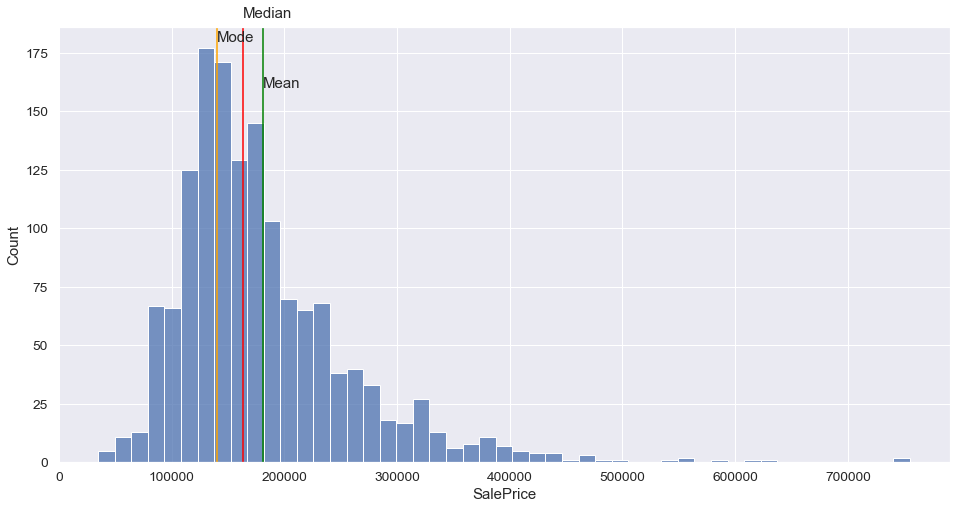

In [21]:
# Histogram to understand the distribution of the target variable
# Distribution deviates from a normal distribution and is positive/right-skewed
# This means that the mean is to the RIGHT of the median
# Also it shows higher Kurtosis, meaning it has many values centered around the mode 
# Kurtosis is a measure of peakedness (or flatness)
mean, mode, median = train_df['SalePrice'].mean(), train_df['SalePrice'].mode()[0], train_df['SalePrice'].median()

fig, ax = plt.subplots(figsize=(16, 8))
sns.set_style('whitegrid')

sns.histplot(train_df['SalePrice'])

plt.axvline(mean, color='green')
plt.text(mean, 160, 'Mean')

plt.axvline(mode, color='orange')
plt.text(mode, 180, 'Mode')

plt.axvline(median, color='red')
plt.text(median, 190, 'Median')#; #; to remove text output

In [22]:
# The values here support the observation
# Usually a skew value between -0.5 and 0.5 indicates a symmetrical distribution (her it is ~1.88)
# Skewness between -1 and -0.5 or 0.5 and 1 indicates moderate skewness
# Less then -1 or greater than 1 indicates high skewness

# Normal distribution has a kurtosis of 0 (mesokurtic)
# Kurtosis values above 0 -> leptokurtic
# Kurtosis values below 0 -> platykurtic
# This distribution is leptokurtic, meaning it can have "fat tails" (if we look at the histogram we can see a value of > 700.000 very far to the right)

print(f'The skew is {train_df["SalePrice"].skew()}')
print(f'The kurtosis is {train_df["SalePrice"].kurt()}')

The skew is 1.8828757597682129
The kurtosis is 6.536281860064529


# Missing values

In [23]:
# Check how much data is missing and immediately remove anything with more than 20 percent missing
# The rest will be filled with the mean after doing One-Hot Encoding in the next cell
# Alternative would be to try MICE (Multiple Imputation by Chained Equations) - works even well with a lot of missing data
# Maybe for future - check if the data is MCAR (missing completely at random)

absolute_missing = train_df.isnull().sum().sort_values(ascending=False)
percentage_missing = train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0]
missing_df = pd.DataFrame({'Absolute': absolute_missing, 'Percentage': percentage_missing})

train_df.drop(missing_df[missing_df['Percentage'] > 0.20].index, axis=1, inplace=True)

missing_df.head(19)

,Absolute,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# Identify most meaningful variables in relation to the target variable 'SalePrice'

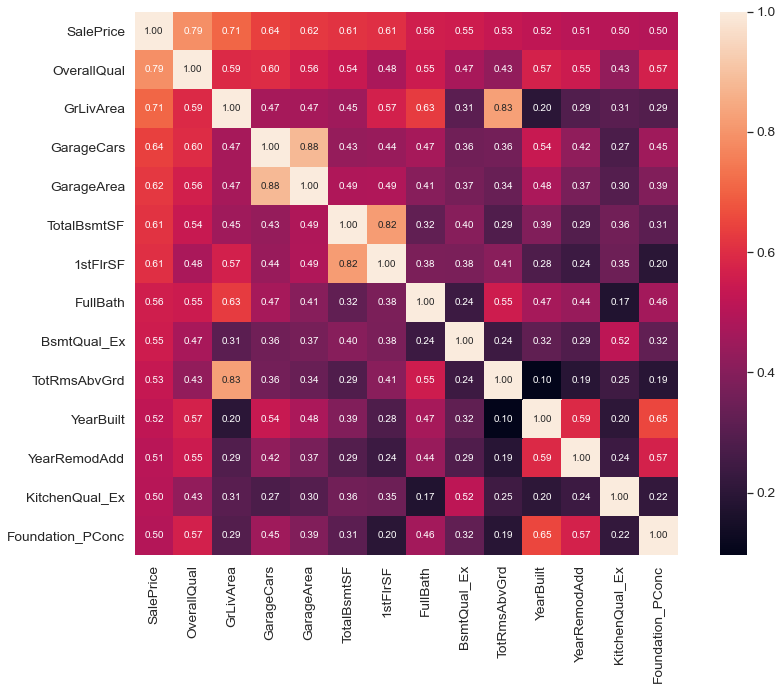

In [24]:
# Assuming a linear relationship between the variables
# Alternatives for non-linear relationships would be Spearman's/Kendall's rank correlation coefficient

# Converting the categorical variables into numerical ones with One-Hot Encoding and fill null values with the mean
# Looking at the 14 variables with the highest correlation to the target variable SalePrice
train_df = pd.get_dummies(train_df)
#train_df = add_cat_cols(train_df)
train_df = train_df.fillna(train_df.mean())

corr_mat = train_df.corr()
top_14_cols = corr_mat.nlargest(14, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[top_14_cols].values.T)

fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=top_14_cols.values, xticklabels=top_14_cols.values);

Some points to note: it looks like some variables correlate with each other and are redundant:
- GarageCars and GarageArea (0.88). A bigger Garage automatically means more cars can be stored. 
- TotalBsmtSF and 1stFlrSF (0.82) - possible explanation: a basement is rarely bigger/smaller than the first floor of a house, they should always be roughly the same. 
- GrLivArea and TotRmsAbvGrd (0.83) also correlate heavily, because the rooms above ground/grade also indicate the living area there. 
- YearRemodAdd and YearBuilt (0.57) kinda correlate as well, because if a house wasn't remodeled, then the year is the same for those variables.

Variables to remove:
- GarageCars (although the correlation is higher, the GarageArea is more meaningful)
- 1stFlrSF
- TotRmsAbvGrd

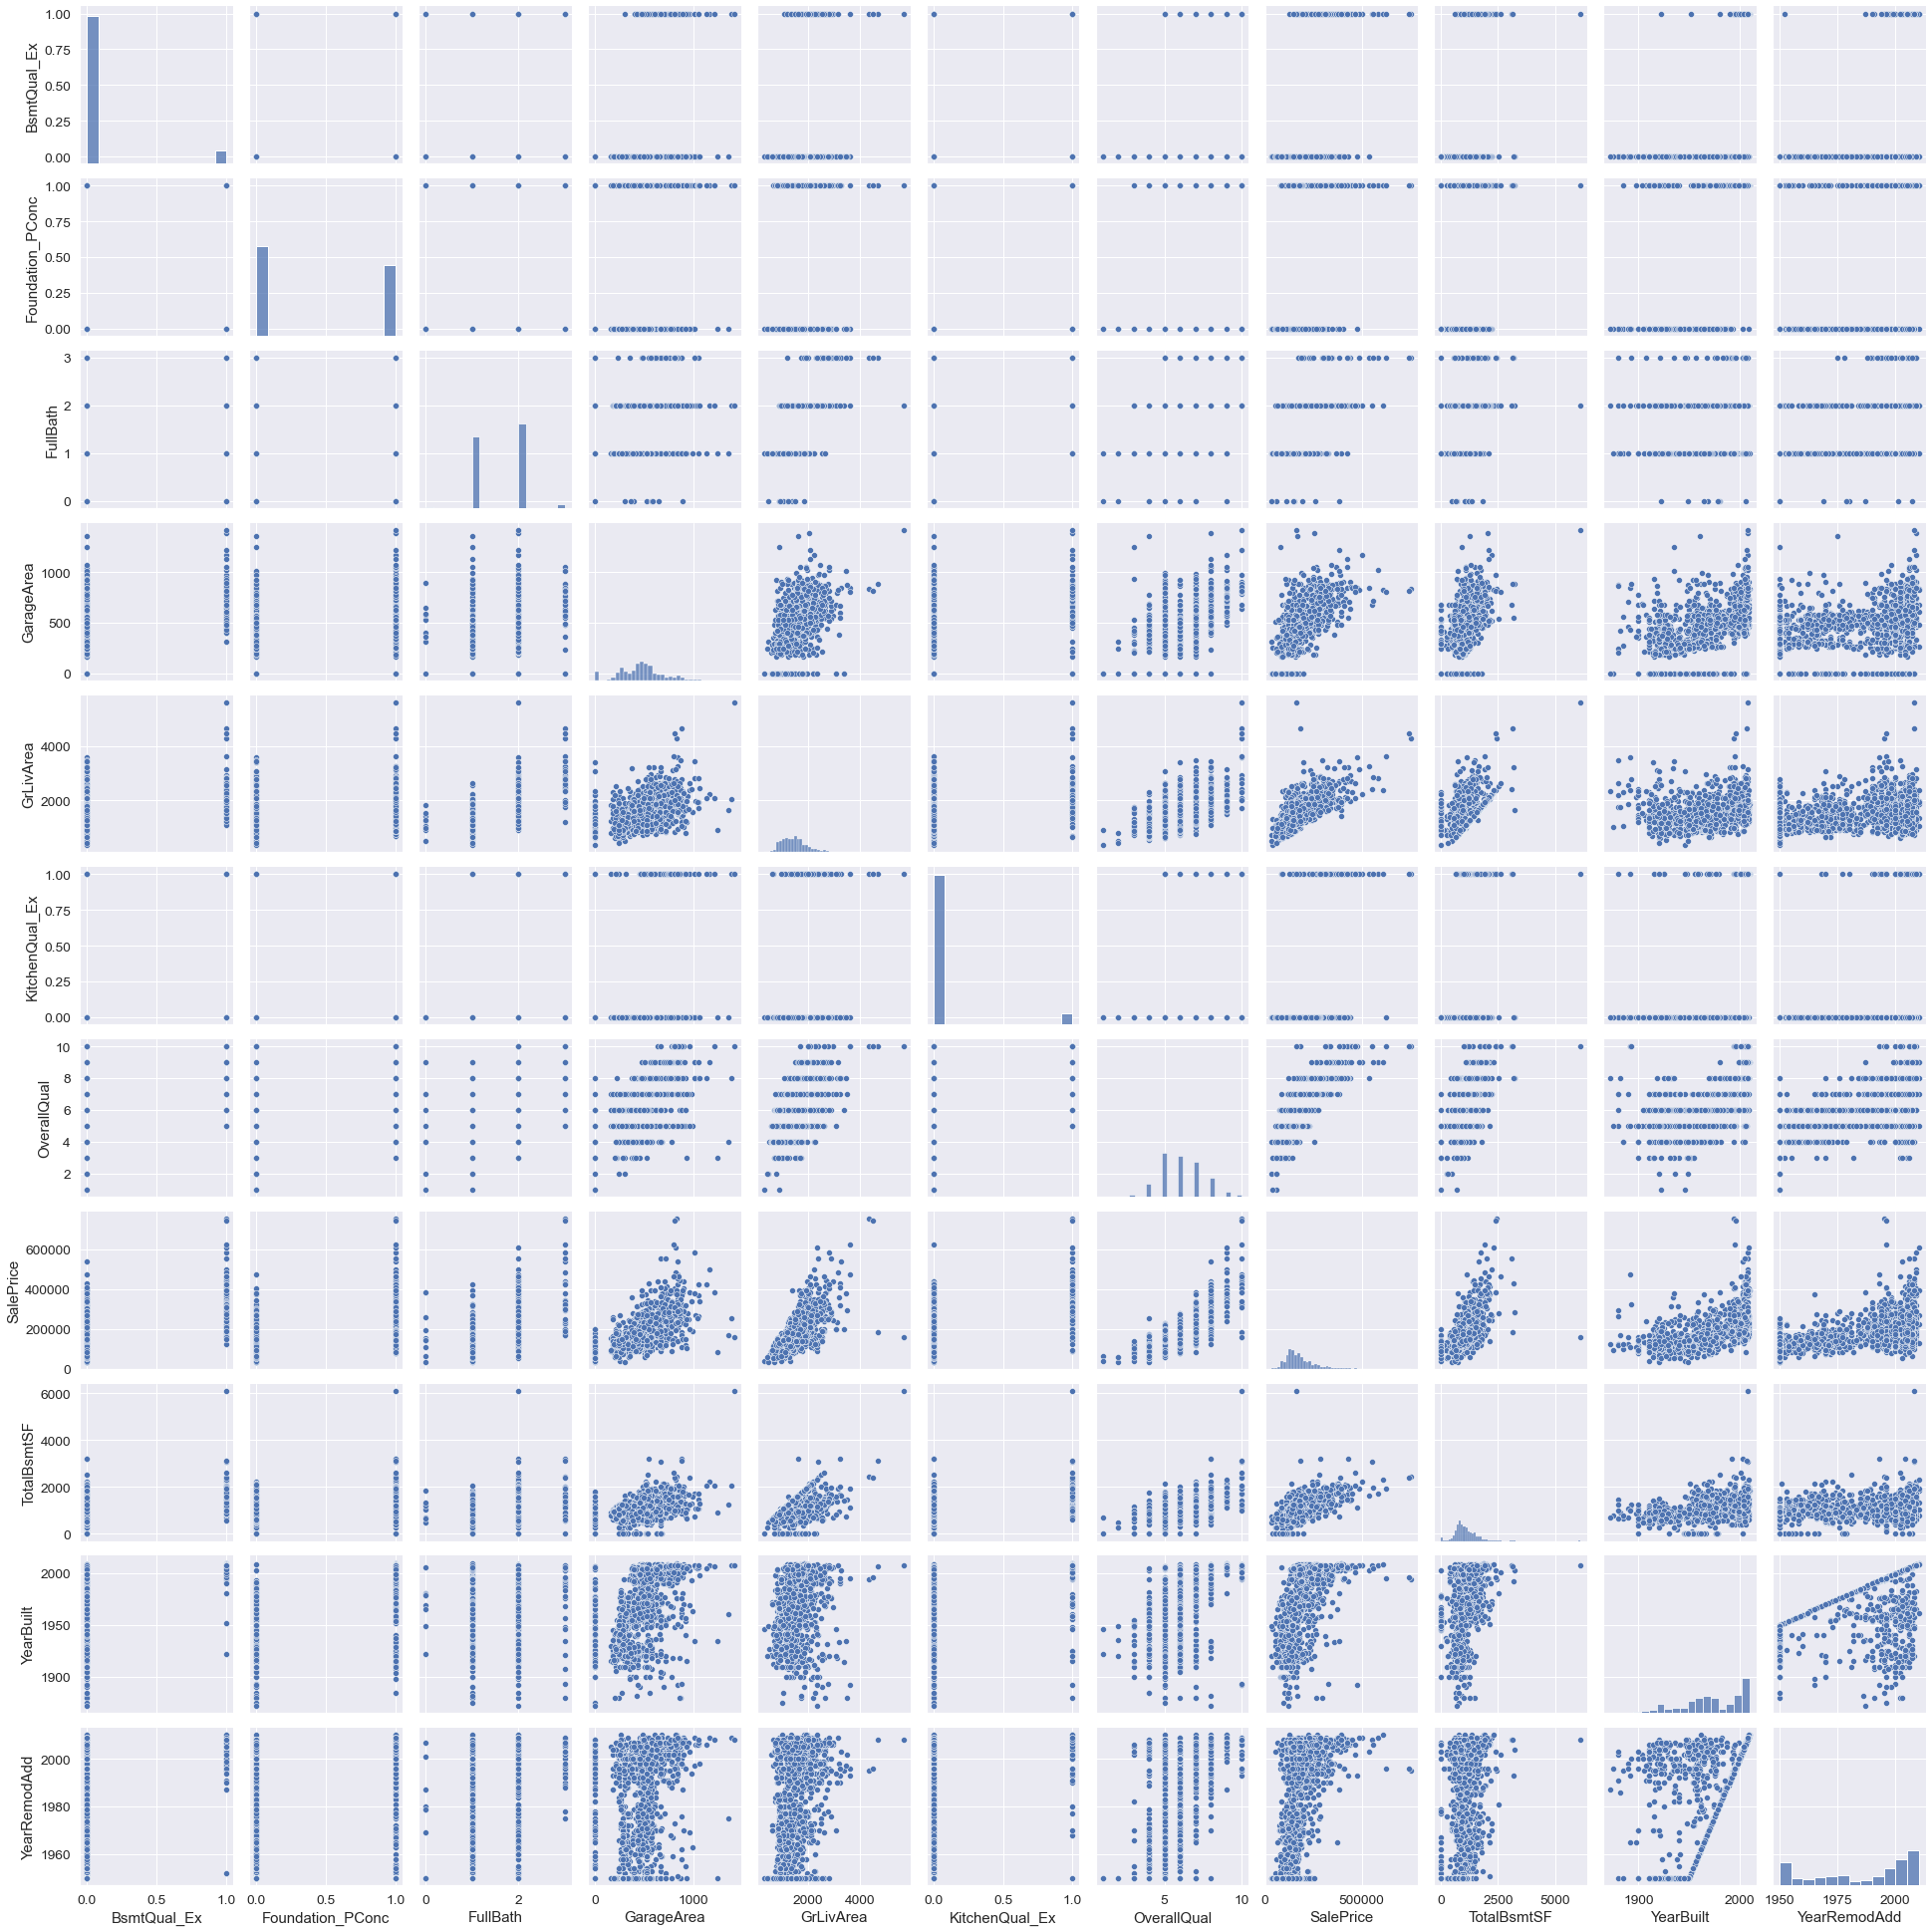

In [25]:
cols = top_14_cols.symmetric_difference(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd'])

sns.pairplot(train_df[cols])

Interesting findings: 
- YearBuild and YearRemodAdd form a linear boundary - this can be explained, that the remodeled year can't be lower than the year the house was build.
- Also TotalBsmtSF and GrLivArea seem to form a linear boundary as well - the explanation is similar if we consider the finding from above, that the 1st floor is generally same in size as the basement. The GrLivArea can't be lower than the TotalBsmtSF! 
- Looking at the pairplots for SalePrice it's apparent that a linear relationship is present.

In [36]:
# The sale price gets a logarithmic transformation, to counter the effects of the skewness and achieve a normal distribution
# As mentioned before the (numerical) variables will be scaled/normalized
train_df['SalePrice'] = np.log(train_df['SalePrice'])

# Include the other log-transformations here as well


std_scaler = StandardScaler()

numeric_columns = train_df[cols].select_dtypes(include=['int64', 'float64']).columns

scaled_train_df = train_df[cols].copy()
scaled_train_df[numeric_columns] = std_scaler.fit_transform(scaled_train_df[numeric_columns])


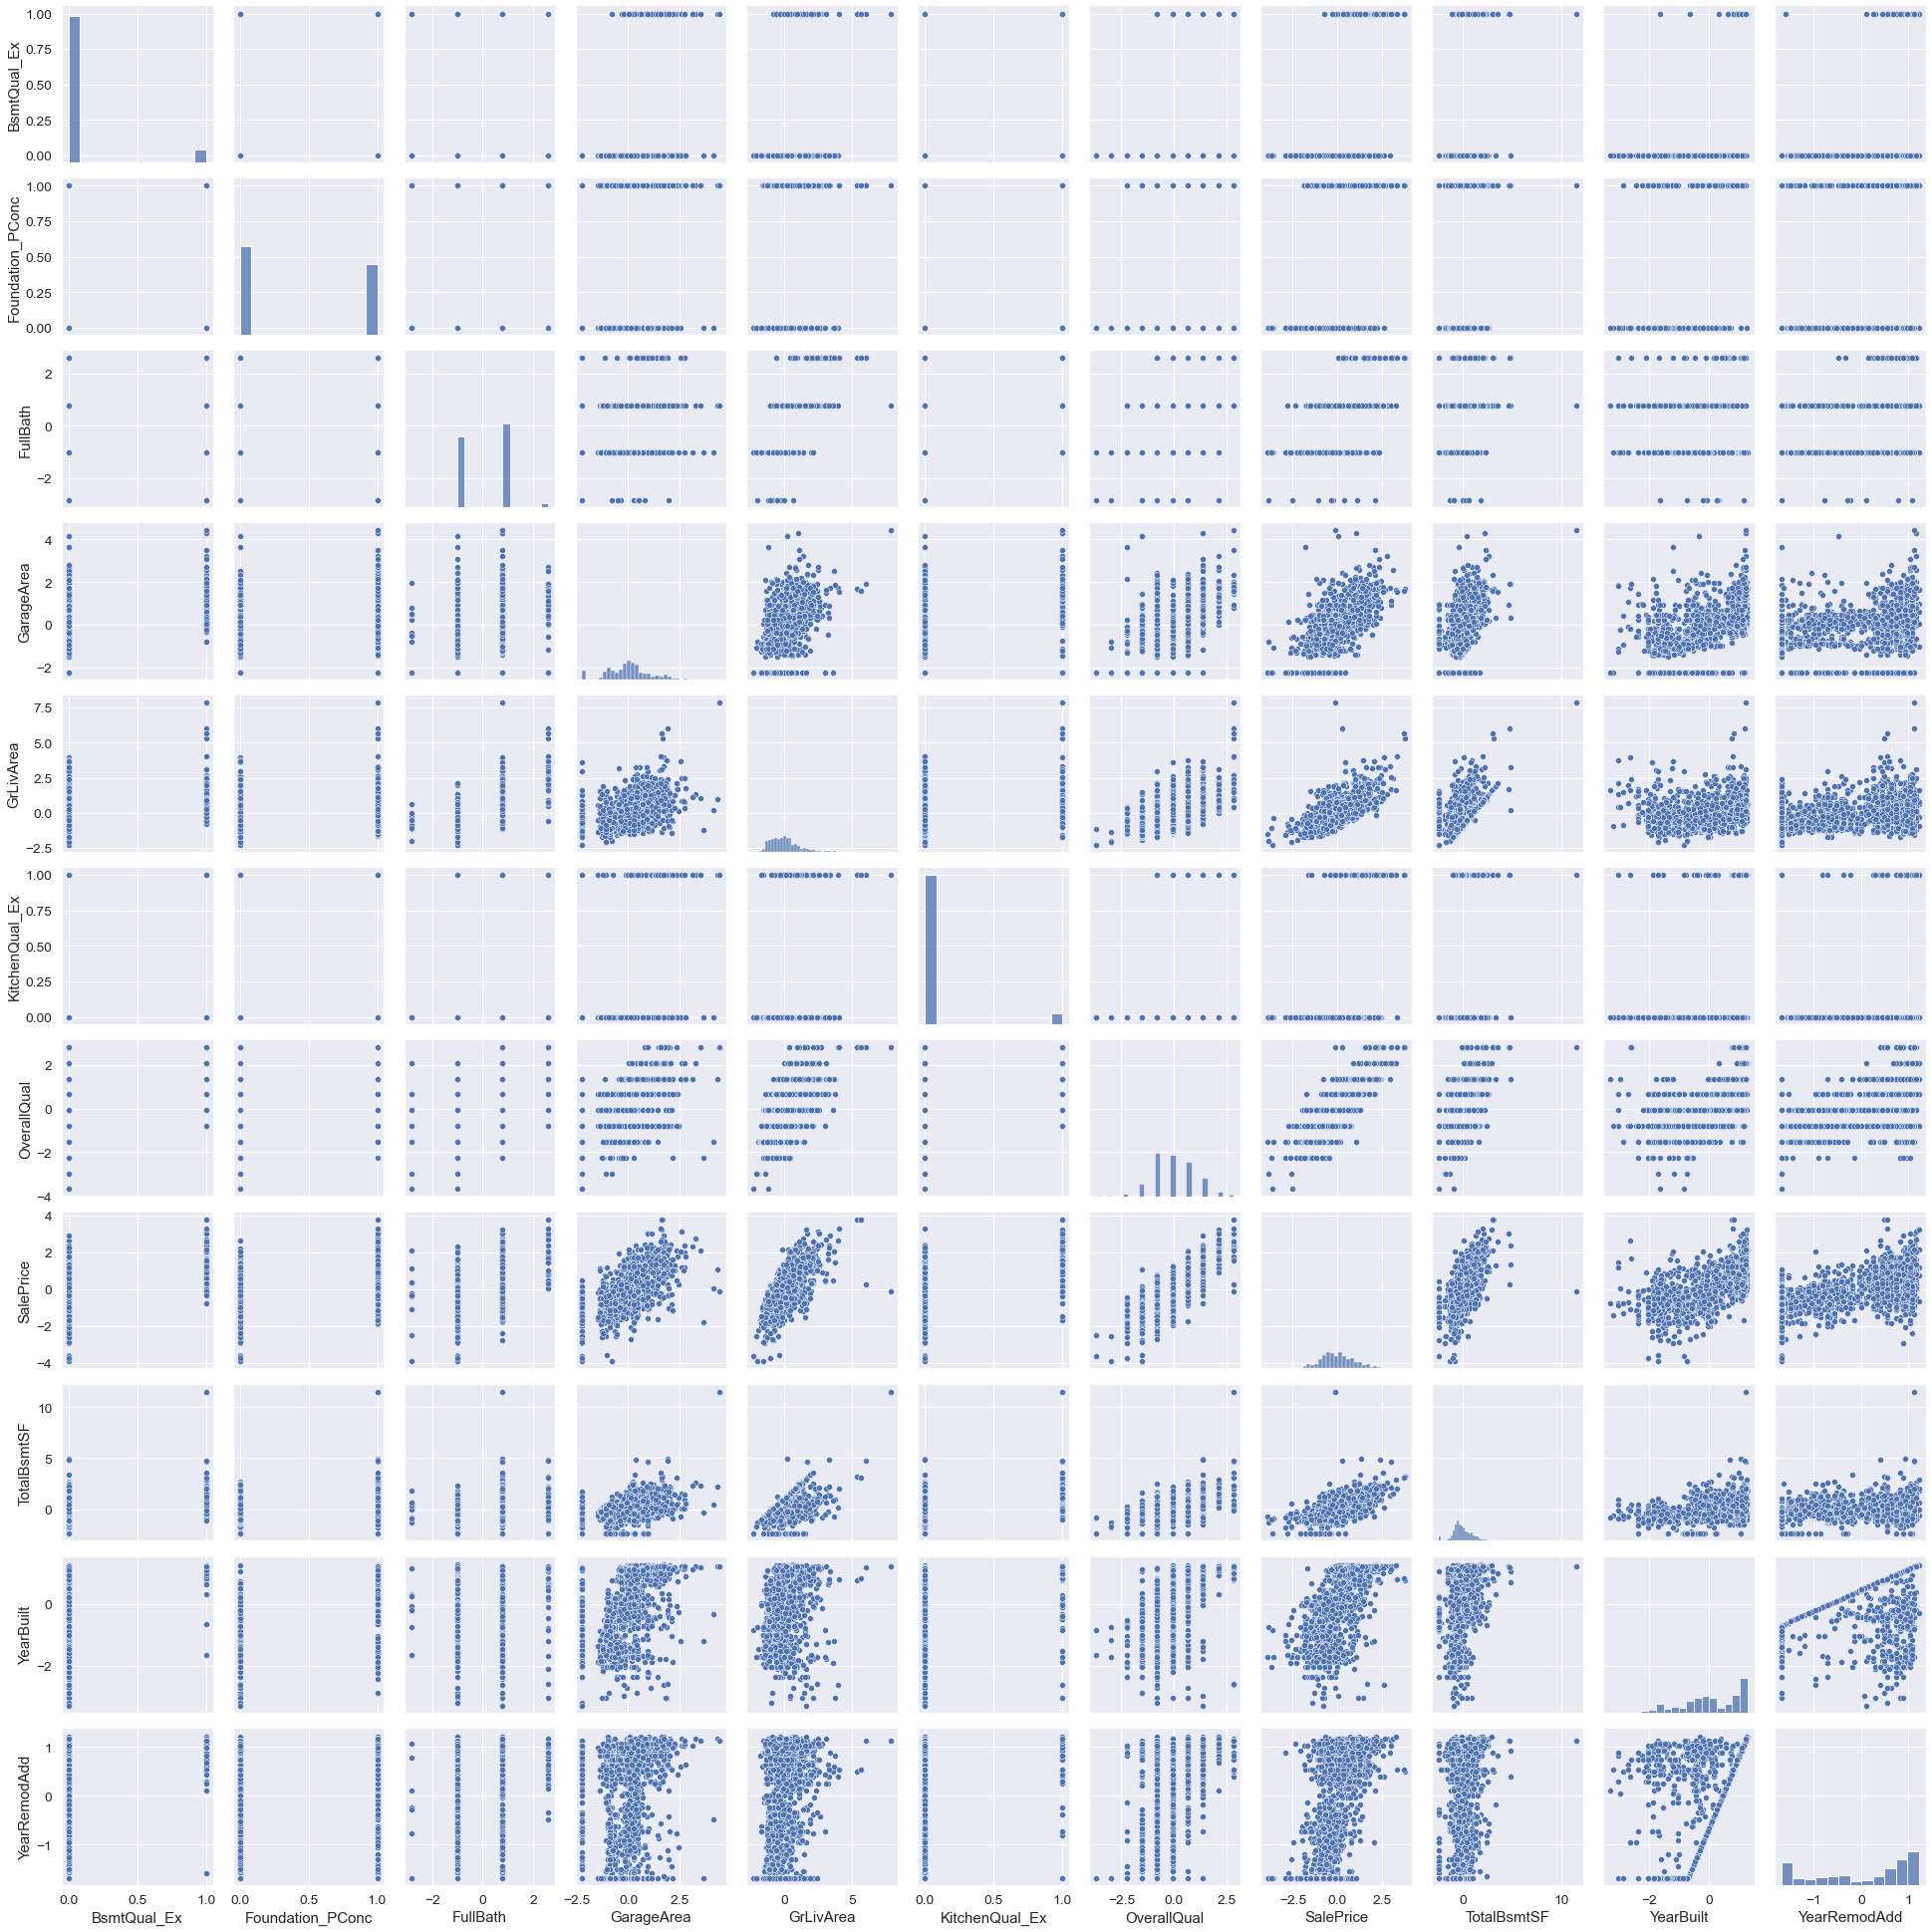

In [37]:
sns.pairplot(scaled_train_df)

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

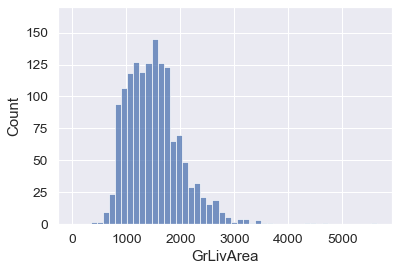

In [45]:
sns.histplot(train_df['GrLivArea'])


<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

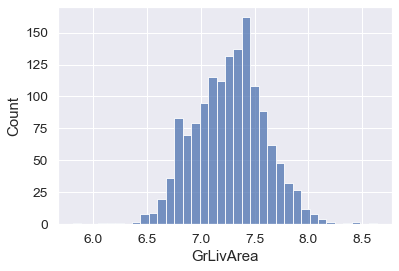

In [46]:
sns.histplot(np.log(train_df['GrLivArea']))